# Question 1: XOR Gate Classification

# XOR using Single Layer Perceptron.

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Define the activation function
def activation_function(x):
    return 1 if x >= 0 else 0

# Step 2: Define the Perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = np.random.rand(2)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate

    # Step 3: Perceptron prediction
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return activation_function(weighted_sum)

    # Step 4: Train the perceptron using the training data
    def train(self, training_inputs, labels, epochs=20):
        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}:')
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                print(f' Inputs: {inputs}, Prediction: {prediction}, Actual: {label}, Error: {error}')
                print(f' Updated Weights: {self.weights}, Updated Bias: {self.bias}')
            print()


training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

perceptron = Perceptron(learning_rate=0.1)

perceptron.train(training_inputs, labels, epochs=10)

print('Testing the Perceptron model:')
for inputs in training_inputs:
    output = perceptron.predict(inputs)
    print(f' Inputs: {inputs}, Predicted Output: {output}')



Epoch 1/10:
 Inputs: [0 0], Prediction: 1, Actual: 0, Error: -1
 Updated Weights: [0.47810245 0.20636047], Updated Bias: 0.42831110325925015
 Inputs: [0 1], Prediction: 1, Actual: 1, Error: 0
 Updated Weights: [0.47810245 0.20636047], Updated Bias: 0.42831110325925015
 Inputs: [1 0], Prediction: 1, Actual: 1, Error: 0
 Updated Weights: [0.47810245 0.20636047], Updated Bias: 0.42831110325925015
 Inputs: [1 1], Prediction: 1, Actual: 0, Error: -1
 Updated Weights: [0.37810245 0.10636047], Updated Bias: 0.32831110325925017

Epoch 2/10:
 Inputs: [0 0], Prediction: 1, Actual: 0, Error: -1
 Updated Weights: [0.37810245 0.10636047], Updated Bias: 0.22831110325925016
 Inputs: [0 1], Prediction: 1, Actual: 1, Error: 0
 Updated Weights: [0.37810245 0.10636047], Updated Bias: 0.22831110325925016
 Inputs: [1 0], Prediction: 1, Actual: 1, Error: 0
 Updated Weights: [0.37810245 0.10636047], Updated Bias: 0.22831110325925016
 Inputs: [1 1], Prediction: 1, Actual: 0, Error: -1
 Updated Weights: [0.278

# XOR using Multi-Layer Perceptron.

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])  # XOR labels

# Step 1: Define the MLP model with more neurons
mlp_model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

# Step 2: Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
mlp_model.fit(training_inputs, labels, epochs=5000, verbose=0)

# Step 4: Test the MLP model after training
print("Testing the Multi-Layer Perceptron model:")
mlp_predictions = mlp_model.predict(training_inputs)
mlp_predictions = (mlp_predictions > 0.5).astype(int)

# Step 5: Display predictions
for input_vector, pred in zip(training_inputs, mlp_predictions):
    print(f"Input: {input_vector}, Predicted Output: {pred[0]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing the Multi-Layer Perceptron model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


# Question 2 B. Sentiment Analysis Using ANN on IMDb Movie Reviews

Loading and preprocessing the dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
df = pd.read_csv('IMDB_Dataset.csv')

# Preprocessing function to clean text data
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in '.,!?'])
    return text
df['review'] = df['review'].apply(preprocess_text)


1. Lowercasing: Ensures uniformity by converting all text to lowercase.
2. Punctuation Removal: Simplifies the text by removing punctuation marks that do not contribute to sentiment.


Tokenization and Padding

In [28]:
max_words = 10000
max_len = 200

# Tokenization process
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=max_len)


1. Tokenization: Converts words into numerical representations.
2. Padding: Ensures that all sequences have the same length for input into the neural network.


Convert Sentiment to Numerical Values

In [29]:
# Convert sentiment to numerical values (1 for positive, 0 for negative)
y = np.array(df['sentiment'].map({'positive': 1, 'negative': 0}))


Spliting the Data

In [30]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building the Model

In [31]:
# Build the ANN model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(max_len,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Explanation:
1. ReLU Activation: Chosen for hidden layers due to its ability to mitigate vanishing gradient problems and introduce non-linearity.
2. Sigmoid Activation: Used in the output layer for binary classification tasks; it outputs probabilities between 0 and 1.
3. Binary Cross-Entropy Loss: Suitable for binary classification as it measures how well the predicted probabilities match true labels.


Training the Model

In [32]:
# Train the model on training data with validation split (20% of training data)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4976 - loss: 318.6036 - val_accuracy: 0.5063 - val_loss: 0.8246
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5023 - loss: 3.8154 - val_accuracy: 0.5001 - val_loss: 0.6984
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4973 - loss: 1.4335 - val_accuracy: 0.5002 - val_loss: 0.6946
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5064 - loss: 1.0794 - val_accuracy: 0.5009 - val_loss: 0.6931
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5030 - loss: 0.8513 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5074 - loss: 0.8011 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5009 - loss: 0.7592 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4971 - loss: 0.7739 

The model is trained over multiple epochs with a validation split to monitor performance during training

 Evaluate the Model

In [33]:
# Evaluate model performance on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred_classes))


Test accuracy: 0.5039
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4961
           1       0.50      1.00      0.67      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.34     10000
weighted avg       0.25      0.50      0.34     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model's accuracy is evaluated on test data. Predictions are made and classified based on a threshold of 0.5.

Visualizing Training History

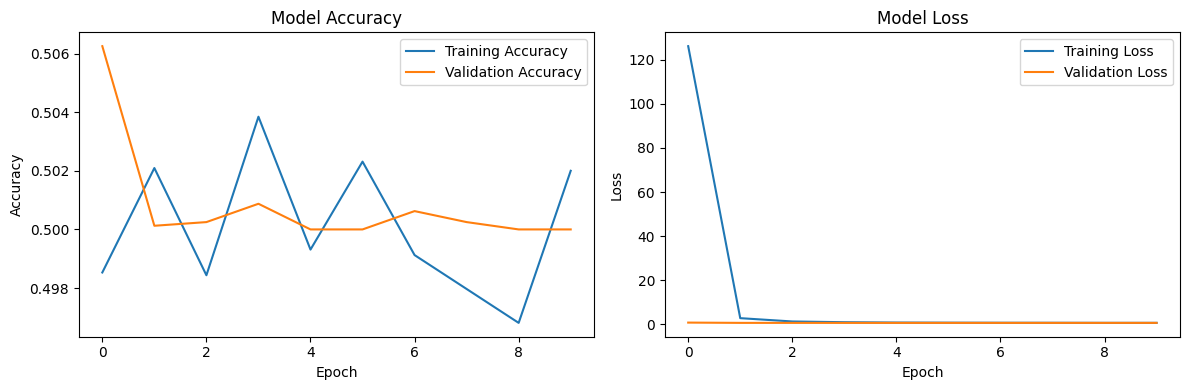

In [34]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Justification for Binary Cross-Entropy Loss:

- **Binary Cross-Entropy** is the ideal loss function for binary classification tasks because it evaluates the performance of models that output probabilities between 0 and 1 (as the sigmoid activation does). It penalizes incorrect predictions more heavily when the model is confident in the wrong class, helping to guide the model toward more accurate predictions.